In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv("loan_sanction_test.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

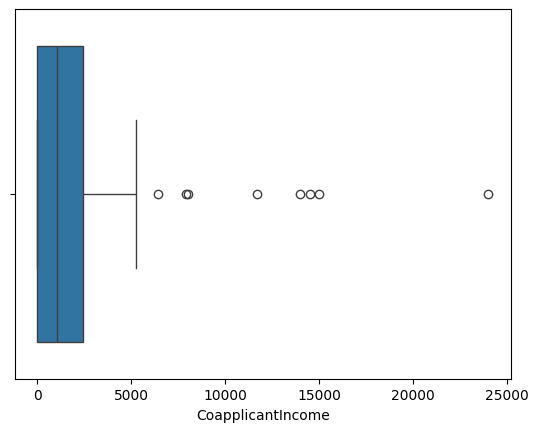

In [5]:
sns.boxplot(x="CoapplicantIncome",data=data)
plt.show()

In [6]:
q1=data["CoapplicantIncome"].quantile(0.25)
q3=data["CoapplicantIncome"].quantile(0.75)
iqr=q3-q1

In [7]:
min_r=q1-(1.5*iqr)
max_r=q3+(1.5*iqr)
min_r,max_r

(np.float64(-3645.75), np.float64(6076.25))

In [9]:
data=data[data["CoapplicantIncome"]<max_r]

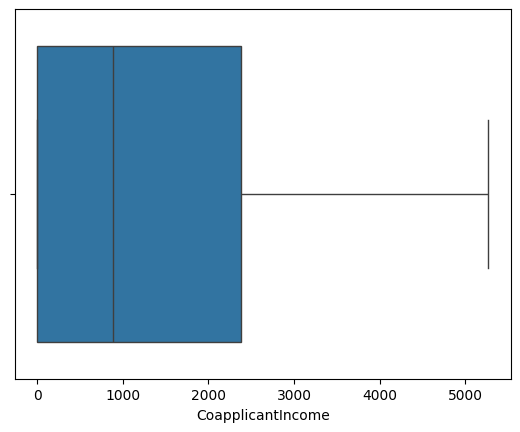

In [10]:
sns.boxplot(x="CoapplicantIncome",data=data)
plt.show()

In [11]:
from sklearn.preprocessing import FunctionTransformer

In [13]:
ft=FunctionTransformer(func=np.log1p)

In [14]:
ft.fit(data[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [21]:
ft.transform(data[["CoapplicantIncome"]])

,CoapplicantIncome
0,0.000000
1,7.313887
2,7.496097
3,7.842671
4,0.000000
...,...
362,7.483244
363,6.565265
364,7.597898
365,7.780721
